# FarmTech Solutions - Análise de Rendimento de Safra
### Projeto: Previsão de Produtividade Agrícola
### Autor: [lembrar da gente colocar nome de grupo]
### Data: 27/08/2025
### Objetivo:
Desenvolver um sistema de previsão de rendimento de safra baseado em condições ambientais, utilizando:
- **Análise Exploratória de Dados (EDA)** para compreensão dos padrões
- **Clustering** para identificação de tendências e outliers
- **5 Modelos de Regressão** para predição de produtividade
- **Avaliação comparativa** com métricas apropriadas

## 📊 Estrutura do Projeto

### 1. 🚀 Setup e Imports
### 2. 📥 Carregamento e Exploração dos Dados
### 3. 🔍 Análise Exploratória (EDA)
### 4. 🧹 Preparação e Limpeza dos Dados
### 5. 🎯 Análise de Clustering (Tendências)
### 6. 🤖 Desenvolvimento dos Modelos Preditivos
### 7. �� Avaliação e Comparação dos Modelos
### 8. 📋 Conclusões e Limitações

## 1. 🚀 Setup e Imports

### Bibliotecas Necessárias
Vamos começar importando apenas as bibliotecas essenciais para análise exploratória:
- **pandas**: manipulação e análise de dados
- **numpy**: operações numéricas
- **matplotlib & seaborn**: visualizações

In [2]:
# =============================================================================
# 1. SETUP E IMPORTS
# =============================================================================

# Importar bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Bibliotecas importadas com sucesso!")
print("📊 Configurações de visualização aplicadas!")

✅ Bibliotecas importadas com sucesso!
📊 Configurações de visualização aplicadas!


## 2. 📥 Carregamento e Exploração dos Dados

### Dataset: crop_yield.csv
Vamos carregar nosso dataset e fazer uma primeira inspeção para entender:
- **Estrutura**: quantas linhas e colunas
- **Tipos de dados**: variáveis numéricas vs categóricas
- **Valores faltantes**: qualidade dos dados
- **Primeiras impressões**: distribuições básicas

In [5]:
# =============================================================================
# CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS
# =============================================================================

# Carregar o dataset
print("�� Carregando dataset crop_yield.csv...")
df = pd.read_csv('../data/raw/crop_yield.csv')

# =============================================================================
# 1. INSPEÇÃO INICIAL - ESTRUTURA DOS DADOS
# =============================================================================

print("\n" + "="*60)
print("📋 INFORMAÇÕES BÁSICAS DO DATASET")
print("="*60)

# Dimensões do dataset
print(f"📏 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Informações sobre tipos de dados e valores não-nulos
print("\n📊 Informações sobre tipos de dados:")
df.info()

# =============================================================================
# 2. PRIMEIRAS IMPRESSÕES - VISUALIZAÇÃO INICIAL
# =============================================================================

print("\n" + "="*60)
print("�� PRIMEIRAS 5 LINHAS DO DATASET")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("�� ESTATÍSTICAS DESCRITIVAS")
print("="*60)
display(df.describe())

# =============================================================================
# 3. VERIFICAÇÃO DE QUALIDADE DOS DADOS
# =============================================================================

print("\n" + "="*60)
print("🔍 VERIFICAÇÃO DE QUALIDADE")
print("="*60)

# Verificar valores faltantes
print("❓ Valores faltantes por coluna:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ Nenhum valor faltante encontrado!")
else:
    print(missing_values[missing_values > 0])

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\n�� Linhas duplicadas: {duplicates}")

print("\n✅ Carregamento e exploração inicial concluída!")

�� Carregando dataset crop_yield.csv...

📋 INFORMAÇÕES BÁSICAS DO DATASET
📏 Dimensões: 156 linhas × 6 colunas

📊 Informações sobre tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB

�� PRIMEIRAS 5 LINHAS DO DATASET


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



�� ESTATÍSTICAS DESCRITIVAS


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000



🔍 VERIFICAÇÃO DE QUALIDADE
❓ Valores faltantes por coluna:
✅ Nenhum valor faltante encontrado!

�� Linhas duplicadas: 0

✅ Carregamento e exploração inicial concluída!


## 3. 🔍 Análise Exploratória (EDA)

### Racional da EDA:
A análise exploratória é fundamental para entender os padrões nos dados agrícolas antes de qualquer modelagem. Vamos seguir uma abordagem sistemática:

### Estratégia de Análise:
1. **Análise Univariada**:
   - Variáveis categóricas (cultura)
   - Variáveis numéricas (temperatura, umidade, precipitação)
2. **Análise Bivariada**:
   - Correlações entre variáveis ambientais
   - Relacionamento com produtividade
3. **Análise Multivariada**:
   - Padrões complexos por cultura
   - Insights agrícolas específicos

### Objetivos:
- Entender distribuições das variáveis
- Identificar outliers e anomalias climáticas
- Descobrir relacionamentos entre condições ambientais e produtividade
- Aplicar conhecimento do domínio agrícola

### Teoria:
- **Distribuições**: histogramas revelam se os dados seguem distribuições normais
- **Outliers**: valores extremos podem indicar condições climáticas anômalas
- **Correlações**: relacionamentos lineares entre variáveis ambientais
- **Análise por grupos**: como diferentes culturas respondem às condições

🔍 Iniciando Análise Exploratória dos Dados...
 Foco: Análise univariada para entender distribuições individuais

🌾 ANÁLISE DA VARIÁVEL 'CROP'(CULTURA)
📋 Culturas disponíveis no dataset:
   → 4 culturas diferentes encontradas
   → Culturas: Cocoa, beans, Oil palm fruit, Rice, paddy, Rubber, natural

📊 Distribuição das culturas:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64

⚖️  Análise de equilíbrio:
   → Cocoa, beans: 39 registros (25.0%)
   → Oil palm fruit: 39 registros (25.0%)
   → Rice, paddy: 39 registros (25.0%)
   → Rubber, natural: 39 registros (25.0%)


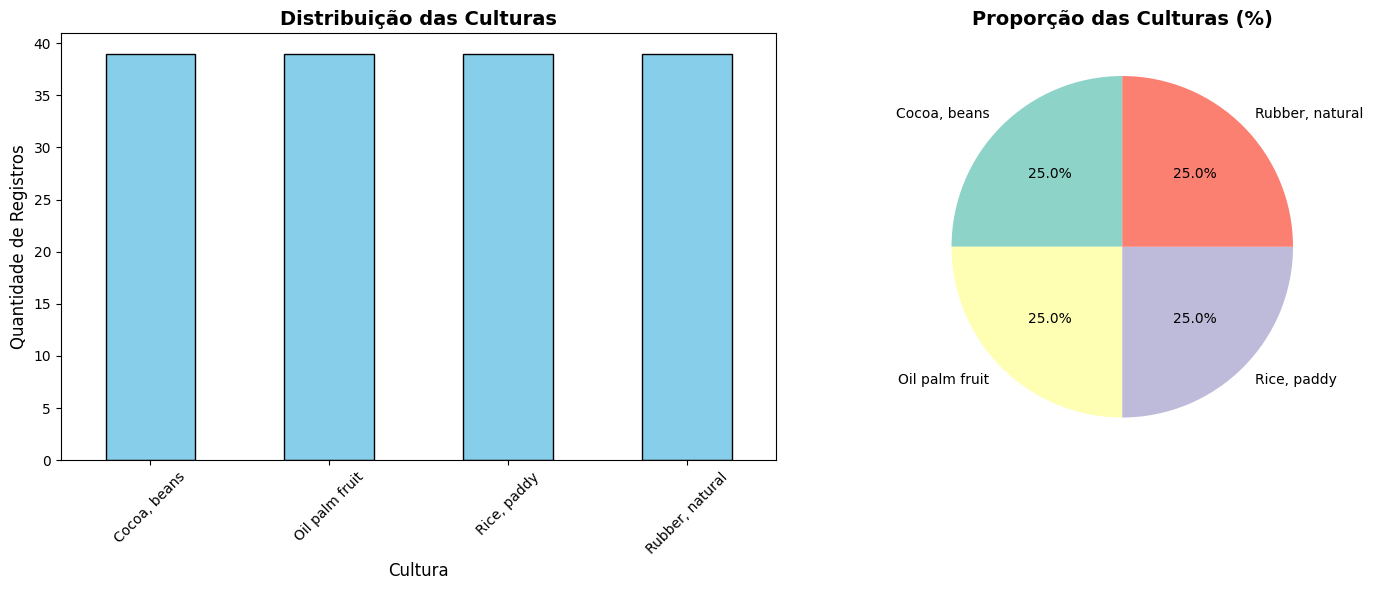


✅ Análise univariada da variável 'Crop' concluída!
💡 Insights: Verificamos distribuição e equilíbrio das culturas no dataset


In [11]:
# =============================================================================
# ANÁLISE EXPLORATÓRIA DOS DADOS (EDA) - PARTE 1: ANÁLISE UNIVARIADA
# =============================================================================

print("🔍 Iniciando Análise Exploratória dos Dados...")
print(" Foco: Análise univariada para entender distribuições individuais")

# =============================================================================
# 1. ANÁLISE DA VARIÁVEL CATEGÓRICA: CULTURA
# =============================================================================

print("\n" + "="*70)
print("🌾 ANÁLISE DA VARIÁVEL 'CROP'(CULTURA)")
print("="*70)

# Verificar culturas únicas e suas frequências
print("📋 Culturas disponíveis no dataset:")
unique_crops = df['Crop'].unique()
print(f"   → {len(unique_crops)} culturas diferentes encontradas")
print(f"   → Culturas: {', '.join(unique_crops)}")

# Análise de distribuição
print("\n📊 Distribuição das culturas:")
crop_distribution = df['Crop'].value_counts()
print(crop_distribution)

# Verificar se há desequilíbrio significativo
total_records = len(df)
print(f"\n⚖️  Análise de equilíbrio:")
for crop, count in crop_distribution.items():
    percentage = (count / total_records) * 100
    print(f"   → {crop}: {count} registros ({percentage:.1f}%)")

# =============================================================================
# 2. VISUALIZAÇÃO DA DISTRIBUIÇÃO DAS CULTURAS
# =============================================================================

# Criar figura com subplots para melhor organização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
crop_distribution.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribuição das Culturas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cultura', fontsize=12)
ax1.set_ylabel('Quantidade de Registros', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pizza para proporções
ax2.pie(crop_distribution.values, labels=crop_distribution.index, 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
ax2.set_title('Proporção das Culturas (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Análise univariada da variável 'Crop' concluída!")
print("💡 Insights: Verificamos distribuição e equilíbrio das culturas no dataset")